# Capstone proposal by Monvert Nicolas MARS 2020

# NBA players scoring prediction

This notebook is a template for your project proposal.

The details are outlined in the **Proposal** unit on the platform - you should address all points from those instructions with as many markdown/code cells as needed. This should include code, observations, discussions and the planned steps.

## 1) The problem

I am a passionate about basketball. I have been playing this sport since 1996, therefore for me it was obvious that I wanted to work on this topic. NBA (National Basketball Association) is the most famous and renowned league. Everyone, even our mothers know some players, from Michael Jordan to Lebron James.

In this exercice, I would like to build a model based on historical data to predict the number of points made by a single player, for any specific game. Based on the data available, I don't expect to have an incredibly high accuracy, because not all parameters can not be retrieved on a dataset (such as the player mood and other external factors), but more to be able to extract some trends.

__The target will be to predict the number of points made per game for a chosen player.__



## 2) The data

### (a) Clear overview of your data

I found my ideal dataset on Kaggle (actually before reaching the capstone project). But I had a look, this dataset was used on 5 occasions, and none of them seems tackling my problem, or even being close. https://www.kaggle.com/nathanlauga/nba-games/kernels

The main dataset is the one diplayed above:

In [3]:
import pandas as pd
games_full = pd.read_csv('games_details.csv')
games_full.head(3)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0


In [3]:
games_full.shape

(576782, 28)

In [7]:
games_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576782 entries, 0 to 576781
Data columns (total 28 columns):
GAME_ID              576782 non-null int64
TEAM_ID              576782 non-null int64
TEAM_ABBREVIATION    576782 non-null object
TEAM_CITY            576782 non-null object
PLAYER_ID            576782 non-null int64
PLAYER_NAME          576782 non-null object
START_POSITION       221374 non-null object
COMMENT              92260 non-null object
MIN                  484521 non-null object
FGM                  484521 non-null float64
FGA                  484521 non-null float64
FG_PCT               484521 non-null float64
FG3M                 484521 non-null float64
FG3A                 484521 non-null float64
FG3_PCT              484521 non-null float64
FTM                  484521 non-null float64
FTA                  484521 non-null float64
FT_PCT               484521 non-null float64
OREB                 484521 non-null float64
DREB                 484521 non-null float64
RE

This set of data is providing information per player per each game played:
 - The ID of the game played
 - The ID of his team (+some nominal information for the team)
 - The ID of the player and his name
 - Nominal information about the starting position
 - Number of minutes played during the game
 - A bunch of continous data about the performance during the game (Number of shots taken, number of shot made, number of rebounds, assists, steal, blocks, turnover (losing the ball), faults and plus minus.
 - Obviously our target that the number of point made.

In [13]:
games_full.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,576782.0,2.153582e+07,5.496051e+06,1.030000e+07,2.060063e+07,2.110046e+07,2.160020e+07,4.180041e+07
TEAM_ID,576782.0,1.610613e+09,8.659398e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,576782.0,2.793802e+05,7.768096e+06,1.500000e+01,2.366000e+03,2.007570e+05,2.026930e+05,1.962938e+09
FGM,484521.0,3.561808e+00,3.007389e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,484521.0,7.859736e+00,5.638048e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,484521.0,4.151030e-01,2.515667e-01,0.000000e+00,2.500000e-01,4.290000e-01,5.630000e-01,1.000000e+00
FG3M,484521.0,7.197397e-01,1.175101e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,484521.0,2.024738e+00,2.456552e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.400000e+01
FG3_PCT,484521.0,1.924704e-01,2.885316e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.330000e-01,1.000000e+00
FTM,484521.0,1.752254e+00,2.365303e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


Let's have a quick look, we have not a single data below 0 for the MIN of all our continuous figures, which is a good sign. Except for PLUS_MINUS, but it is an evaluation. The maximum of each feature sound also perfectly align with my knowledge of this sport.

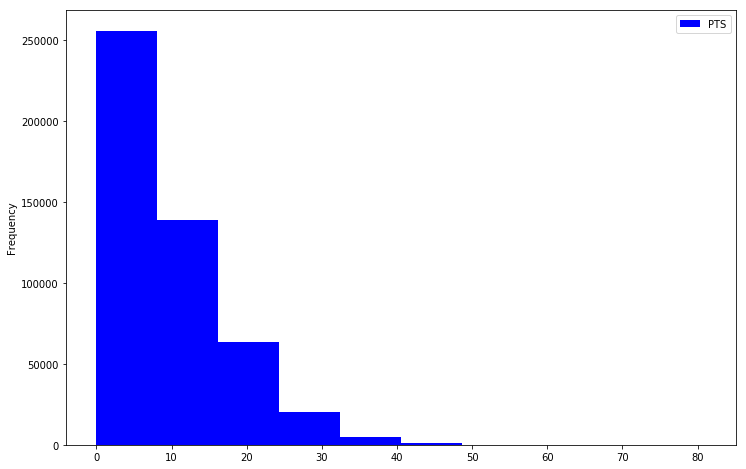

In [17]:
# Visual check on PTS which our target
%matplotlib inline
import matplotlib.pyplot as plt
games_full.plot(kind='hist', x='PLAYER_ID', y='PTS', color='blue', figsize=(12,8))
plt.show();

The target has not any outliers, all the figures and proportions seem to be right. As we can see, the figures are __skewed on the left, therefore we will have to apply a log transform.__

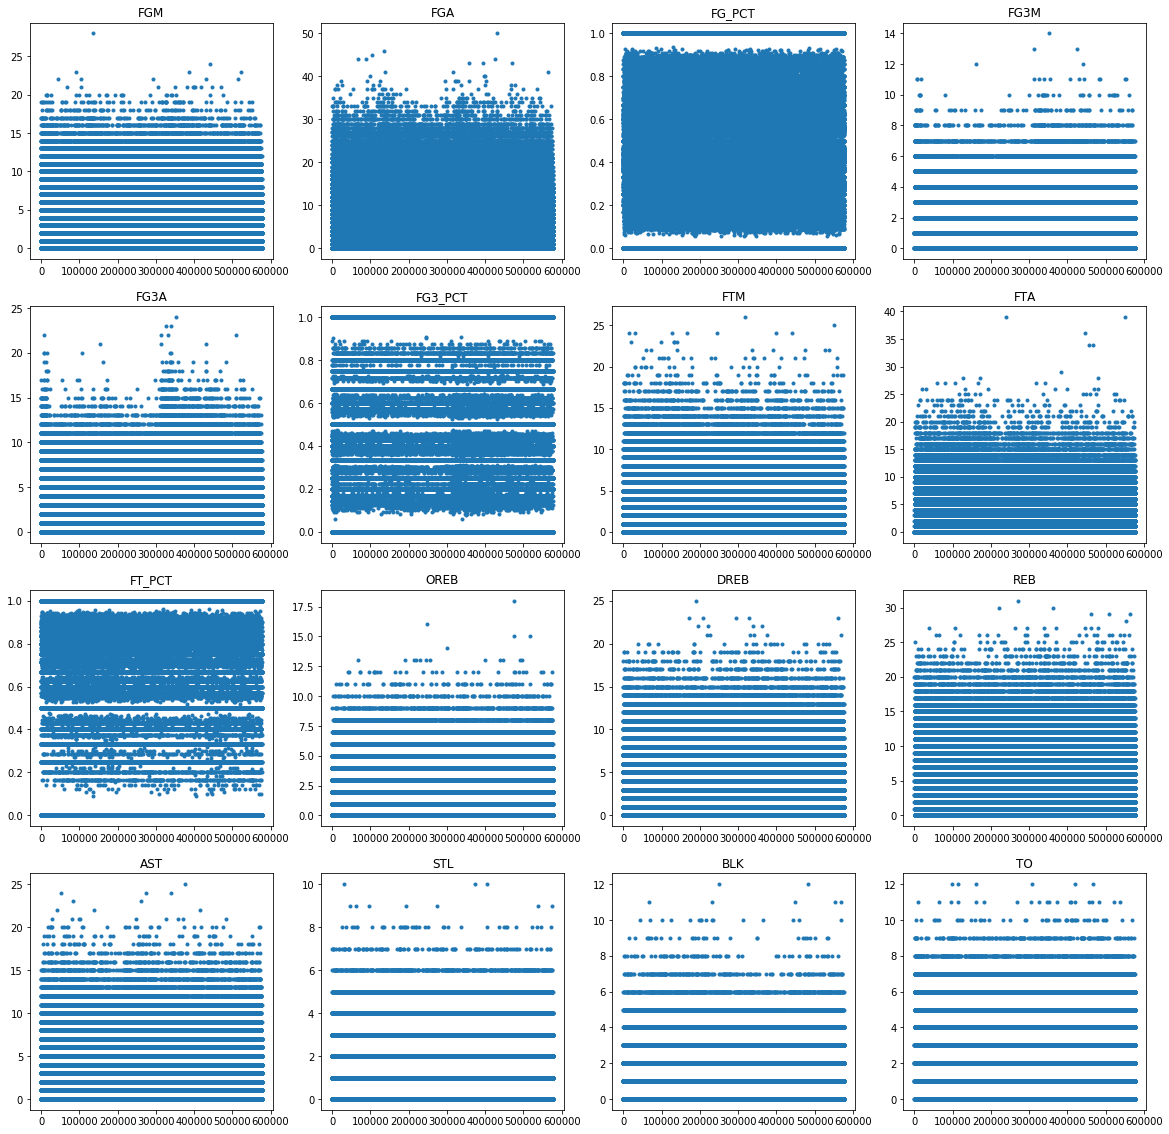

In [20]:
# let's have a look on all the variables
cols = games_full.select_dtypes(include=['float64'])
# Plot the data
fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(20,5*4))
for col,ax in zip(cols,axes.ravel()):
    ax.plot(games_full[col],'.')
    ax.set_title(col);

Data is clean, there is no outliers. We have mainly discrete and value (and continuous for the %). Nothing above 1 and below 0 for the PCT.

Although the file seems to have more than enough rows, let's check the data for a single player, as my objective is to work player by player.

In [11]:
lbj = games_full.loc[games_full['PLAYER_NAME']=='LeBron James']
lbj.head(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
124,21900900,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,36:23,14.0,...,0.0,12.0,12.0,13.0,2.0,0.0,6.0,2.0,34.0,22.0
270,21900891,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,34:20,8.0,...,2.0,6.0,8.0,10.0,1.0,1.0,5.0,1.0,19.0,-12.0
1056,21900861,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,34:13,17.0,...,2.0,6.0,8.0,6.0,0.0,1.0,7.0,1.0,40.0,12.0
1331,21900842,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,35:29,9.0,...,0.0,8.0,8.0,9.0,0.0,0.0,2.0,4.0,29.0,-1.0
1858,21900833,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,35:35,10.0,...,0.0,3.0,3.0,7.0,0.0,2.0,1.0,0.0,32.0,6.0


In [21]:
lbj.shape

(1607, 28)

We notice here that this single player has a total of 1607 games recorded in the csv file. Which is big enough to have a reasonable trainset and to test a model.

In [6]:
# To know about NaN
games_full.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       355408
COMMENT              484522
MIN                   92261
FGM                   92261
FGA                   92261
FG_PCT                92261
FG3M                  92261
FG3A                  92261
FG3_PCT               92261
FTM                   92261
FTA                   92261
FT_PCT                92261
OREB                  92261
DREB                  92261
REB                   92261
AST                   92261
STL                   92261
BLK                   92261
TO                    92261
PF                    92261
PTS                   92261
PLUS_MINUS           115922
dtype: int64

As we can quickly see we have here a pretty big dataset. Although it seems that some important data are missing, it is actually not worrying at all. As this dataset displays a single rows for every players for everygame, it is normal that we don't a large number of missing values the 'START_POSITION' because of 12 players per team, only five are actually starting the game. Also, all the others (92261), even though players where part of the 12 potential players, they did not enter the game at all.

I plan to get rid of the column comments, as it does not provide any relevant information. The NaN in START_POSITION to replace by 'substitute'.
For all the columns with 92261 NaN, just to remove those rows as they have no minutes played in the game, therefore nothing to analyze.
For the PLUS and Minus to replace the data per 0, because currently it just mean that even if they played some minutes, they did not have enough time to be evaluated.


I can see that my dataset is clean. Good news.

Below I'll have look on the 2 others datasets that I'll have to use to use to some relevant feature to my models.
I'll use the "games" to extract information such as:
 - GAME_STATUS_TEXT (type of games - playoff, preseason, regular season, etc...)
 - Team ID to know the two teams playing for a single game
 - Season to know which season
 - And in order to know the strenght of the teams, to create a measure with the % of win averaged per season 
 

In [9]:
games = pd.read_csv('games.csv')
games.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1


In [8]:
print(games.shape)

(23195, 21)


This game dataset is providing us information about the game itself. Nothing about the players. On top of the ID that allow us to cross our data, we have:
- nominal information such the type of the game, the opponent team
- Discrete and continuous data such the final result, but also all the team stats (Number of shots taken, number of shot made, number of rebounds, assists, steal, blocks, turnover (losing the ball), faults and plus minus
- Time data with the data, therefore the season of the game

In [12]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,23195.0,2.156394e+07,5.451505e+06,1.030000e+07,2.060059e+07,2.110024e+07,2.160013e+07,4.180041e+07
HOME_TEAM_ID,23195.0,1.610613e+09,8.649845e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,23195.0,1.610613e+09,8.664090e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,23195.0,2.010844e+03,4.829889e+00,2.003000e+03,2.007000e+03,2.011000e+03,2.015000e+03,2.019000e+03
TEAM_ID_home,23195.0,1.610613e+09,8.649845e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,23096.0,1.021491e+02,1.290219e+01,3.600000e+01,9.300000e+01,1.020000e+02,1.110000e+02,1.680000e+02
FG_PCT_home,23096.0,4.599013e-01,5.679371e-02,2.500000e-01,4.200000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,23096.0,7.578742e-01,1.003966e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.260000e-01,1.000000e+00
FG3_PCT_home,23096.0,3.554583e-01,1.146831e-01,0.000000e+00,2.810000e-01,3.550000e-01,4.290000e-01,1.000000e+00
AST_home,23096.0,2.251225e+01,5.153124e+00,6.000000e+00,1.900000e+01,2.200000e+01,2.600000e+01,4.700000e+01


Let's have a quick look on the data we have:
 - Clean data for the season, as the mean is 2003 and the max is indeed 2019 (current season)
 
Others variable are displayed below.

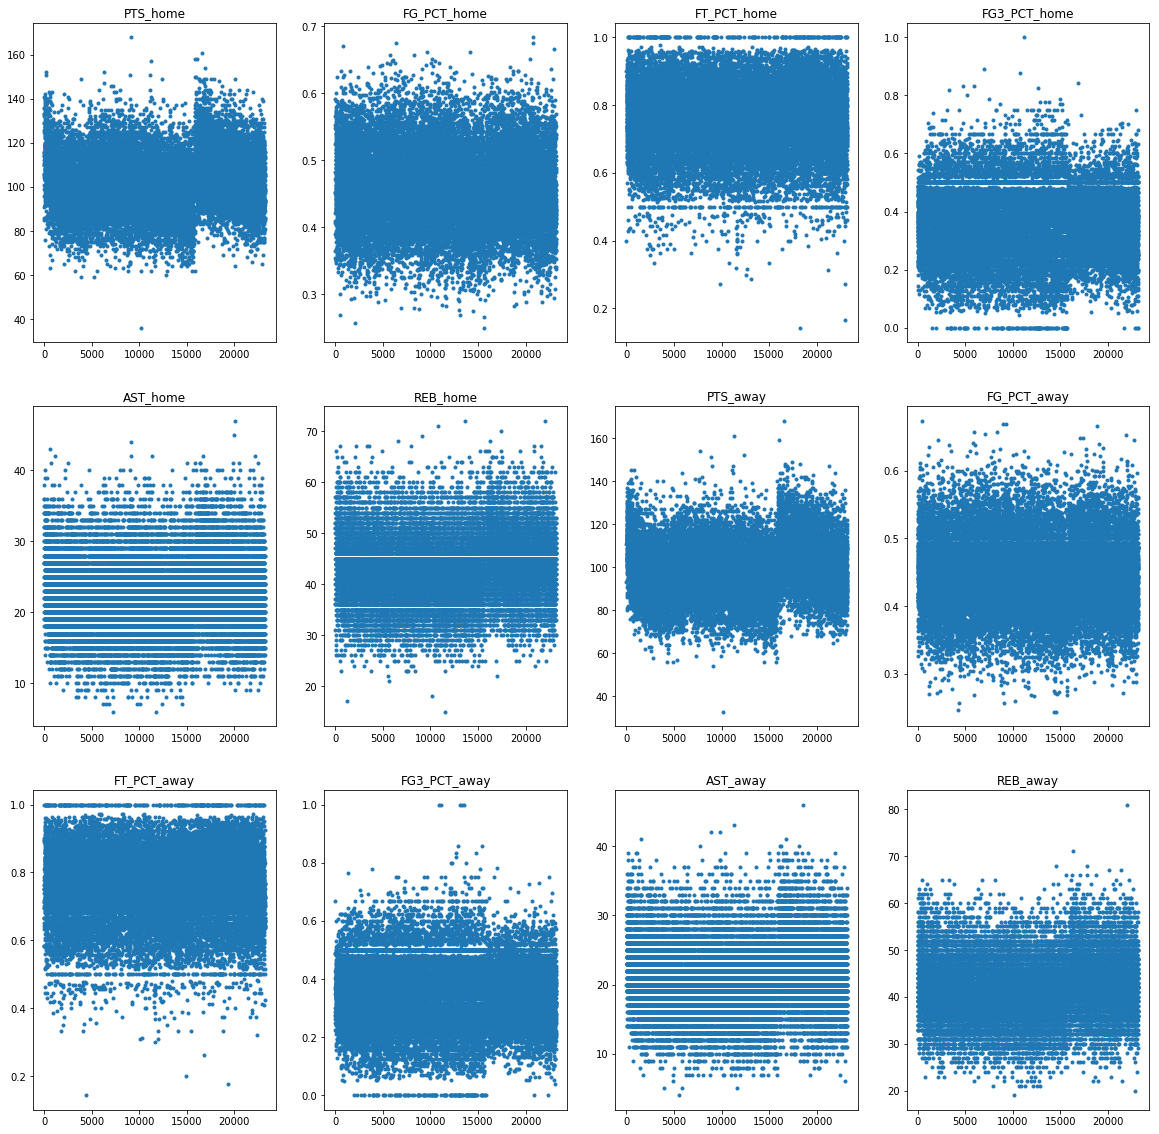

In [22]:
# let's have a look on all the variables
cols = games.select_dtypes(include=['float64'])
# Plot the data
fig,axes = plt.subplots(nrows=3,ncols=4,figsize=(20,5*4))
for col,ax in zip(cols,axes.ravel()):
    ax.plot(games[col],'.')
    ax.set_title(col);

On the charts above, no surprise, everything seems to match with my expectations. Not PCT (%) above 1 or below 0 and other variable make sense.

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Data columns (total 21 columns):
GAME_DATE_EST       23195 non-null object
GAME_ID             23195 non-null int64
GAME_STATUS_TEXT    23195 non-null object
HOME_TEAM_ID        23195 non-null int64
VISITOR_TEAM_ID     23195 non-null int64
SEASON              23195 non-null int64
TEAM_ID_home        23195 non-null int64
PTS_home            23096 non-null float64
FG_PCT_home         23096 non-null float64
FT_PCT_home         23096 non-null float64
FG3_PCT_home        23096 non-null float64
AST_home            23096 non-null float64
REB_home            23096 non-null float64
TEAM_ID_away        23195 non-null int64
PTS_away            23096 non-null float64
FG_PCT_away         23096 non-null float64
FT_PCT_away         23096 non-null float64
FG3_PCT_away        23096 non-null float64
AST_away            23096 non-null float64
REB_away            23096 non-null float64
HOME_TEAM_WINS      23195 non-null int64
dtyp

In [9]:
games.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

This dataset is also clean, the 99 data missing are actually not relevant for us we use those parameters. Let's see the last one which will actully just provide me the name of team, instead of an TEAM_ID.

In [10]:
teams = pd.read_csv('teams.csv')
teams.head(3)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate


Here this dataset is only used to retrieve the name of the name, and not the id.

In [11]:
print(teams.shape)

(30, 14)


In [12]:
teams.isnull().sum()

LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         4
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64

Data is clean, we can go ahead.

### (b) Plan to manage and process the data

I plan to mainly work on the dataframe 'games_full' and add the necessary column from the other notebooks:

 - Merging / doing look ups with the 3 dataset displayed above and using ID as keys. Create one dataset to work (to save it separately).
  - Adding a feature of % win per team per season (Total Win/ Total game played) to better know about the strenght of the team
 - Selecting one player with a lot of records. (one season is around 100 games and the dataset provide me last 17 seasons, which provides some relevant weights)
 - Removing all columns that I can not actually be predicted before a games and keeping only factual feature such as teams, date (then weekday), location of the game, season, opponent team, starting position, type of games (regular season, playoff, preseason), etc...
 - Removing players that don't have significants records. Based on a threshold.
 - Change 'MIN' column into a real minutes format (timestamp).
 - Doing some feature engineering 
  - to transform the date into a weekday and month. 
  - Also to produce and average of minutes played per season as input variable, doing the same with the PLUS_MINUS, FG PCT (Field goal %), REB (rebounds) and others if relevant.
  - To create binary feature if the player is playing at home or away, and doing the same for the conference (east or west).
 - I will do create one-hot encoding for my nominal and categorical features. Paying attention not to create to many columns (cardinality). No more columns than rows, but I should be okay with this point.

## 3) Exploratory data analysis (EDA)

### (a) Preliminary EDA

Given my experience in basketball, I know that a couple of factors present in this dataset that could influence the performance, then the scoring :
- The location (away or home)
- The team where the player is playing (most of the players changed multiple times their team during their carreer)
- The opponent team (known rivarly, pression of the spectators, etc...)
- The current season (then some average in minutes played, PLUS_MINUS could play a role)
- The starting position (some position are more enclined to score that others)
- The status of the game, 3 types: 
    - preseason: Usually not very intense games
    - Regular season : Moderate intensity and usually high over last month
    - Final : Playoff games, usually very intense


I also think and hope that some factors such the weekday or the month could have an impact, especially for the second one as it tells us where do we stand in the season. The model could tell us if it is true.

On the other hand, there is some other information that were not available that would for sure help, such as the shape of the player, his type of training etc...

But let's work with what we have in our hand, I am confident that it's already significant.


First I want to have a look who has the biggest number of game played, to make a better choice in my selection.

In [23]:
games_full['PLAYER_NAME'].value_counts().head(10)

LeBron James      1607
Kyle Korver       1510
Udonis Haslem     1483
Vince Carter      1465
Tony Parker       1420
Andre Iguodala    1385
Dirk Nowitzki     1379
Jamal Crawford    1377
Dwyane Wade       1367
Pau Gasol         1366
Name: PLAYER_NAME, dtype: int64

To see if changing team over the last seasons had an impact on scoring

In [31]:
# Diplay score average per team for LeBron James
lbj.groupby('TEAM_CITY')['PTS'].mean()

TEAM_CITY
Cleveland      27.146692
Los Angeles    25.605042
Miami          26.466334
Name: PTS, dtype: float64

In [32]:
# Diplay score average per team for LeBron James
lbj.groupby('TEAM_CITY')['PTS'].median()

TEAM_CITY
Cleveland      27.0
Los Angeles    25.0
Miami          26.0
Name: PTS, dtype: float64

As we can see, the player is pretty regular are the median is the same ( or very close) to the average

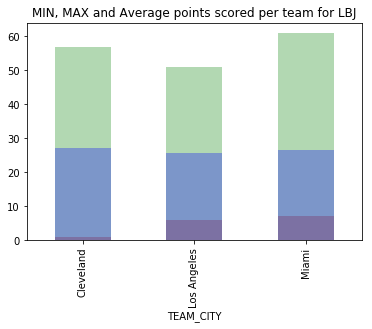

In [39]:
# To diplay min, max, mean on the same chart.
min=lbj.groupby('TEAM_CITY')['PTS'].min()
max=lbj.groupby('TEAM_CITY')['PTS'].max()
avg=lbj.groupby('TEAM_CITY')['PTS'].mean()
min.plot.bar(alpha=0.3, color='r')
max.plot.bar(alpha=0.3, color='g')
avg.plot.bar(alpha=0.3, color='b')
plt.title("MIN, MAX and Average points scored per team for LBJ");

In [33]:
# Diplay number of field goal attempt per season for LeBron James
lbj.groupby('TEAM_CITY')['FGA'].mean()

TEAM_CITY
Cleveland      19.983701
Los Angeles    19.042017
Miami          18.117207
Name: FGA, dtype: float64

In [46]:
# Diplay the % of field goal made per season for LeBron James
lbj.groupby('TEAM_CITY')['FG_PCT'].mean()

TEAM_CITY
Cleveland      0.490333
Los Angeles    0.503857
Miami          0.532970
Name: FG_PCT, dtype: float64

Interesting, the more he takes shots, the lower is his accuary. Let's see this on the full picture for him.

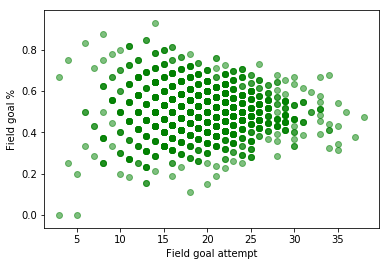

In [51]:
# Scatter plot of point and average points made for LBJ
Y=lbj['FG_PCT']
X=lbj['FGA']

plt.scatter(X,Y, c='g', alpha=0.5)
plt.xlabel('Field goal attempt')
plt.ylabel('Field goal %');

Except that the chart is pretty elegant and look like an insect, we can see a trend for Lebron James (almost mirror effect) that could be explained. 
Let see for the full list of players which is following more or less the same trend.
 - On top, where the % of shot made is egal to 100%, the number of field goal attempt is low.
 - On top, the more player shot, the most the field goal % decrease
 - Below we have the logil but the other way round.

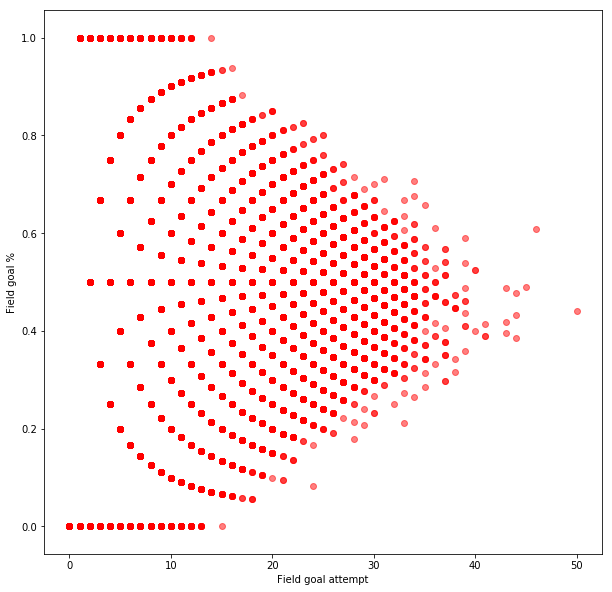

In [54]:
Y2=games_full['FG_PCT']
X2=games_full['FGA']

plt.figure(figsize=(10,10))
plt.scatter(X2,Y2, c='r', alpha=0.5)
plt.xlabel('Field goal attempt')
plt.ylabel('Field goal %');

In [42]:
# Diplay score average when starting in its two positions for LeBron James
lbj.groupby('START_POSITION')['PTS'].mean()

START_POSITION
F    27.546094
G    22.224719
Name: PTS, dtype: float64

This variable clearly has an impact.

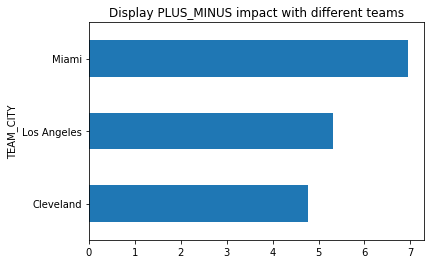

In [38]:
# Display the variation of the impact where Lebron James played
x=lbj.groupby('TEAM_CITY')['PLUS_MINUS'].mean()
x.plot.barh()
plt.title("Display PLUS_MINUS impact with different teams");

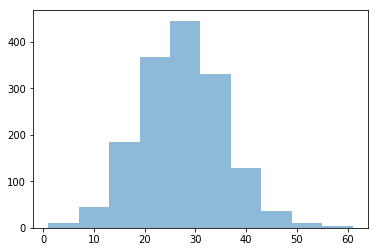

In [45]:
# Make an histogram of the point made for lbj, to understand
plt.hist(x1, alpha=0.5);

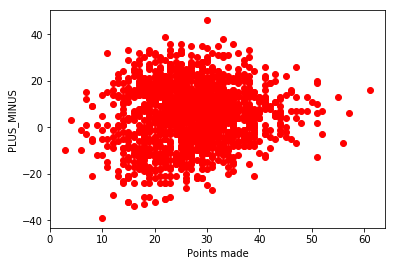

In [41]:
# Scatter plot of point and average points made for LBJ
x1=lbj['PTS']
y1=lbj['PLUS_MINUS']

plt.scatter(x1,y1, c='r')
plt.xlabel('Points made')
plt.ylabel('PLUS_MINUS');

Trend is not really clear, even if we could say than the biggest part of the negative y-axis correspond to the less point made.

The results with all the base is slighly more talkative, as we can see a trend.

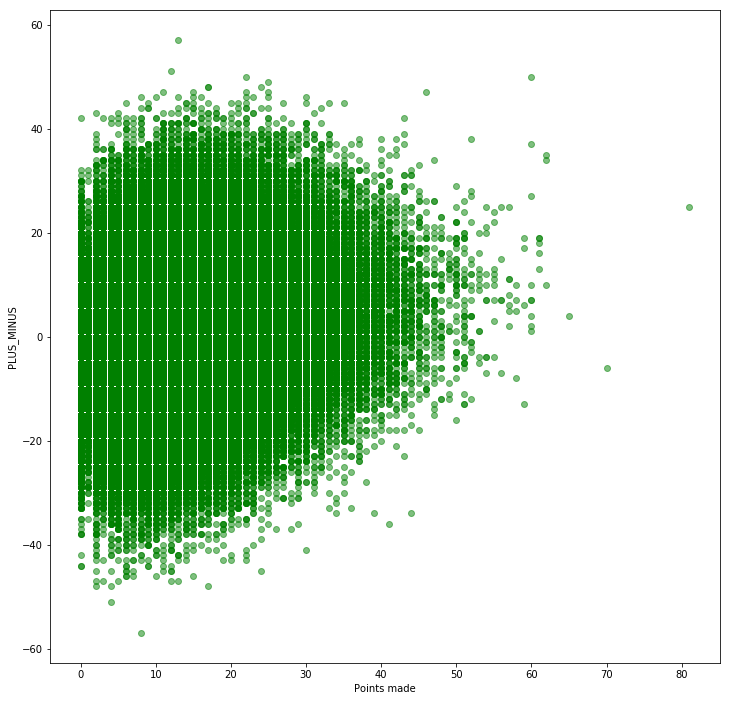

In [43]:
# Scatter plot of point and average points made for all players - exhan
x2=games_full['PTS']
y2=games_full['PLUS_MINUS']

plt.figure(figsize=(12,12))
plt.scatter(x2,y2, c='g', alpha=0.5)
plt.xlabel('Points made')
plt.ylabel('PLUS_MINUS');

This is a brief overview of what could be done to better understand what has and main impact on scoring.
I could and will do more in the full, such as including the year, the minutes player, but I don't want to go too much in details now as working with those feature needs to perform some data engineering.

To see if there is a trend of points scored over the month and years (based on game ID). 

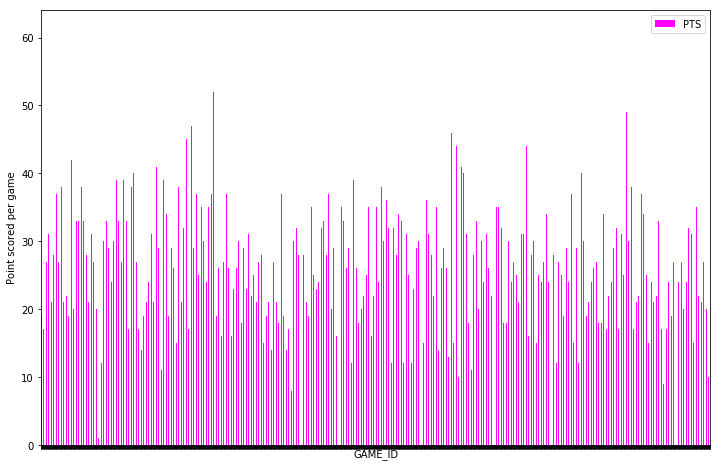

In [49]:
# Point per game evolution per player, at this point game_id should not be shuffled, therefore in a chronological order
%matplotlib inline
import matplotlib.pyplot as plt

lbj.plot(kind='bar', x='GAME_ID', y='PTS', color='magenta', figsize=(12,8))
plt.ylabel("Point scored per game")
plt.tick_params(axis='x',labelbottom=False)
plt.show();

Could be difficult to tell  at this point, therefore it deserves more explanation.

To end this part, we are going to create a scatter plot of our main feature vs the target to see how correlated are our data.

In [4]:
list(games_full)

['GAME_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_CITY',
 'PLAYER_ID',
 'PLAYER_NAME',
 'START_POSITION',
 'COMMENT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'PF',
 'PTS',
 'PLUS_MINUS']

In [17]:
# Here I convert the minutes into a date format for the sake of the visualisation
import datetime as dt
games_full['MIN'] = pd.to_datetime(games_full['MIN'], format='%M:%S',errors='coerce')
games_full['MIN'] = pd.to_datetime(games_full['MIN'], format='%M:%S',errors='coerce').dt.minute
lbj['MIN'] = pd.to_datetime(lbj['MIN'], format='%M:%S',errors='coerce')
lbj['MIN'] = pd.to_datetime(lbj['MIN'], format='%M:%S',errors='coerce').dt.minute

C:\Users\nicolas\Anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\nicolas\Anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


And eventually, looking potential correlation between our target and our features.

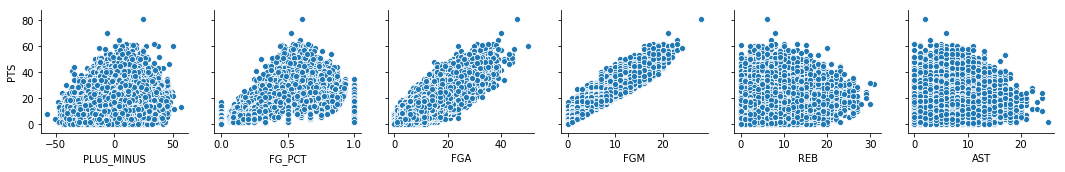

In [6]:
#Create scatter plot with PTS and features (only feature from the main dataframe)
import seaborn as sns
sns.pairplot(games_full, y_vars='PTS',x_vars=['PLUS_MINUS','FG_PCT','FGA','FGM','REB','AST',]); #, kind='reg'

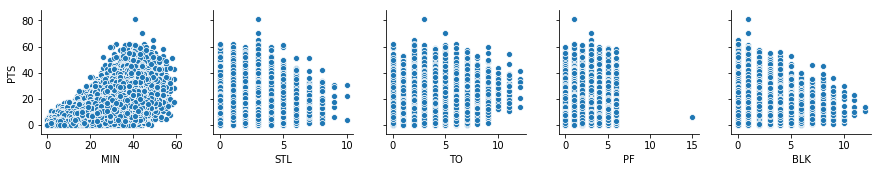

In [18]:
sns.pairplot(games_full, y_vars='PTS',x_vars=['MIN','STL','TO','PF','BLK']); #kind='reg'

I think that except the measures related directly to the scoring it is difficult to see a clear trend (starting with FG). The main reason is probably due to the size of the dataset that is too big, therefore offsetting the the potential white space.

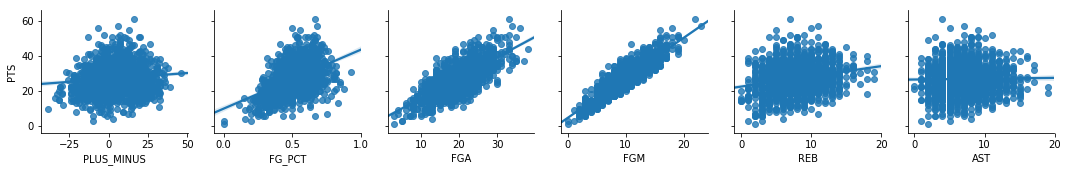

In [12]:
sns.pairplot(lbj, kind='reg', y_vars='PTS',x_vars=['PLUS_MINUS','FG_PCT','FGA','FGM','REB','AST',]); 

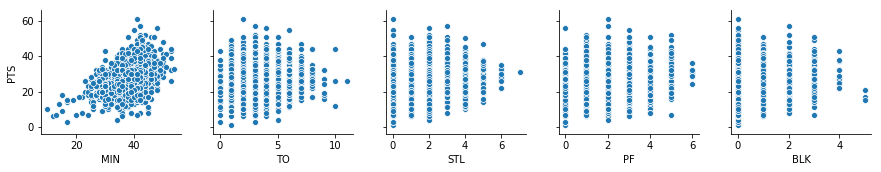

In [19]:
sns.pairplot(lbj, y_vars='PTS',x_vars=['MIN','TO','STL','PF','BLK']);

With one single player, even if it is not so obvious, we can start to see a trend for REB (rebonds) and minutes on top of the obvious ones for scoring.

### (b) How does the EDA inform your project plan?

It gives me some information on which players I should select in terms of relevancy to run model. Also, I discovered that there is not obvious trend in term of scoring, at least for this player. Then it would make sense to go further in the research as a simple regression would definitely not be really useful.
This quick overview of the EDA help me to understand that those features above-mentioned in the documents may have an impact.

### (c) What further EDA do you plan for project?

Potentially to see with which features scoring points could be correlated. For example, number of minutes played.
I also plan to add visuals for average points made vs any teams (doing a 'group by' by team), average points per weekday, average points per type of games, max, min and median points scored per season, etc... And to see the correlation between my target and all my features.

This EDA section will allow me to familiarized with the dataset, and will potentially provide me more idea to further analyze later on.

## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

I would like to build a model that will predict the number of points made per game per any given players in the NBA. It will be a regression problem.
Although it might seem interesting calculate the number of point per minutes per player, it is something quite unusual. for those two reason: 
 - Indeed, number of point per is a measure that bookmakers make, not the average per minute.
 - The number of minute on the floor is link to the point made (Normally, if a player is not scoring well after some attempt, he won't stay on the floor very long).

My target is the number of points made, and my features are the ones mentioned above (day, opponents, game at home/away, average min per season (and other season average), starting position, etc...) 

### (b) What models are you planning to use and why?

I plan to use differents method such as:
 - multiple linear regression
 - huber loss
 - using Knn regressor and/or Random Forest regressor as they are supposed to perform well with non numeric data. 
Then to compare which one is has the best accuracy versus with my testset. 

I plan to use a set with all feature available already mentioned above (2b and 3a), and to try another lighter version only with team opponent. 

### (c) Please tell us your detailed machine learning strategy 

First as a baseline I will do an average of points made. I will work on train set of 80% of the data avaiable (around 1280 games) and make predictions on the remaining test set. I will make sure to shuffle those data, as they are classified by calendar date.

As a preprocessing, as my target value are left skewed, I will apply a log tranformation.
I will run my different models (as mentioned above) and fine tune hyperparameter on a validation set (from my train set) with a gridsearch before testing it on the test set, and pick the one that provide me the best accuracy. As a metrics, I'll use the mean absolute error (MAE) to measures the absolute values of the residuals.

## 5) Additional information

The aim is to build a model for Lebron James. But then, if we want to apply the same model for other players, we just need to have save a CSV filtered on anoter player name.
My work will contain 3 notebooks:

 - __Build the dataframe__ --> Aim is to have a df ready for one player after having done the necessary operation to clean, merge, calculate, etc.
 - __EDA__ --> Aim here is to full understand the DF and its potential.
 - __MachineLearning__ --> Aim will be to run and evaluate my various model to select the best option.